간단한 신경망 만들기
  - 사인그래프 예측

In [30]:
import math
import torch
import matplotlib.pyplot as plt

In [31]:
# -pi ~ pi 사이에 데이터를 1000개 추출
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

In [32]:
x

tensor([-3.1416, -3.1353, -3.1290, -3.1227, -3.1164, -3.1101, -3.1039, -3.0976,
        -3.0913, -3.0850, -3.0787, -3.0724, -3.0661, -3.0598, -3.0535, -3.0473,
        -3.0410, -3.0347, -3.0284, -3.0221, -3.0158, -3.0095, -3.0032, -2.9969,
        -2.9906, -2.9844, -2.9781, -2.9718, -2.9655, -2.9592, -2.9529, -2.9466,
        -2.9403, -2.9340, -2.9278, -2.9215, -2.9152, -2.9089, -2.9026, -2.8963,
        -2.8900, -2.8837, -2.8774, -2.8711, -2.8649, -2.8586, -2.8523, -2.8460,
        -2.8397, -2.8334, -2.8271, -2.8208, -2.8145, -2.8083, -2.8020, -2.7957,
        -2.7894, -2.7831, -2.7768, -2.7705, -2.7642, -2.7579, -2.7516, -2.7454,
        -2.7391, -2.7328, -2.7265, -2.7202, -2.7139, -2.7076, -2.7013, -2.6950,
        -2.6888, -2.6825, -2.6762, -2.6699, -2.6636, -2.6573, -2.6510, -2.6447,
        -2.6384, -2.6321, -2.6259, -2.6196, -2.6133, -2.6070, -2.6007, -2.5944,
        -2.5881, -2.5818, -2.5755, -2.5693, -2.5630, -2.5567, -2.5504, -2.5441,
        -2.5378, -2.5315, -2.5252, -2.51

In [33]:
# y = ax^3 + bx^2 + cx + d
# 계수 또는 가중치  a b c d

- 가중치 초기화

In [34]:
a,b,c,d = torch.randn(()),torch.randn(()),torch.randn(()),torch.randn(())

- 함수를 정의 (3차원 방정식)

In [35]:
y_random = a*x**3 + b*x**2 + c*x + d

In [36]:
type(x), type(y)

(torch.Tensor, torch.Tensor)

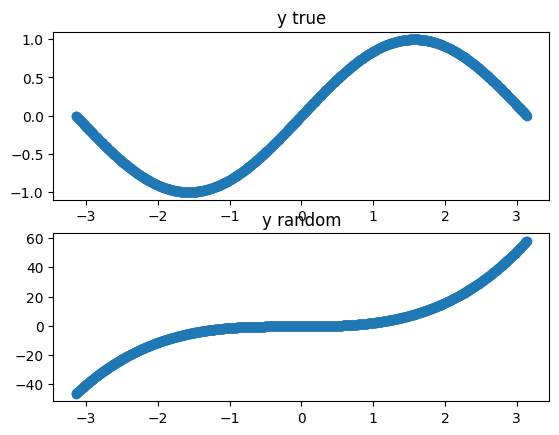

In [37]:
plt.subplot(2,1,1)
plt.title('y true')
plt.plot(x.numpy(),y.numpy(),'o')

plt.subplot(2,1,2)
plt.title('y random')
plt.plot(x.numpy(),y_random.numpy(),'o')

plt.show()

- 학습
  - 가중치 a에 대한 기울기

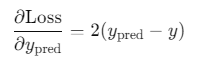

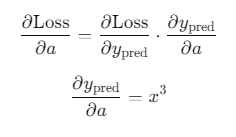

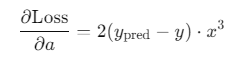

In [39]:
from logging import logProcesses
learning_rate = 1e-6
for epoch in range(3000):  # 학습 2000번 수행
    y_pred = a*x**3 + b*x**2 + c*x + d  #  예측값
    # 회귀는 기본 손실함수
    loss = (y_pred - y).pow(2).sum().item()  # 손실함수
    # 출력
    if (epoch+1) % 100 == 0:
        print(f"epoch : {epoch+1} loss:{loss}")
    # 손실함수에 대한 미분 : 기울기 구하기
    grad_y_pred = 2 * (y_pred - y)

    # 각 가중치(계수)에 대한 기울기 구함  - 역전파
    grad_a = (grad_y_pred * x**3).sum()
    grad_b = (grad_y_pred * x**2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()
    #  적용
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d



epoch : 100 loss:537.513671875
epoch : 200 loss:439.3798828125
epoch : 300 loss:360.5521240234375
epoch : 400 loss:296.0664978027344
epoch : 500 loss:243.30421447753906
epoch : 600 loss:200.12623596191406
epoch : 700 loss:164.78530883789062
epoch : 800 loss:135.85357666015625
epoch : 900 loss:112.16426849365234
epoch : 1000 loss:92.76378631591797
epoch : 1100 loss:76.87256622314453
epoch : 1200 loss:63.85316467285156
epoch : 1300 loss:53.18441390991211
epoch : 1400 loss:44.440216064453125
epoch : 1500 loss:37.27177429199219
epoch : 1600 loss:31.393949508666992
epoch : 1700 loss:26.573287963867188
epoch : 1800 loss:22.618820190429688
epoch : 1900 loss:19.374128341674805
epoch : 2000 loss:16.711204528808594
epoch : 2100 loss:14.525238037109375
epoch : 2200 loss:12.73041820526123
epoch : 2300 loss:11.256342887878418
epoch : 2400 loss:10.045416831970215
epoch : 2500 loss:9.050414085388184
epoch : 2600 loss:8.232644081115723
epoch : 2700 loss:7.560367107391357
epoch : 2800 loss:7.0075063705

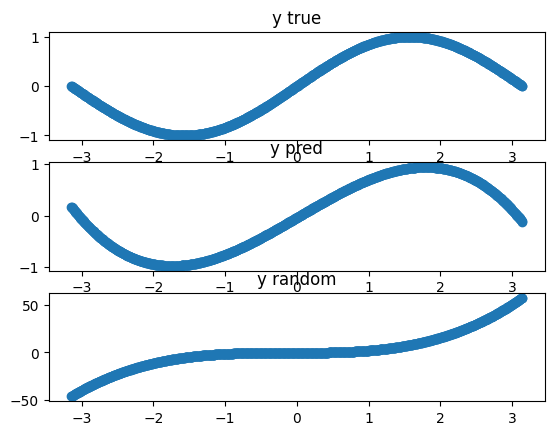

In [42]:
plt.subplot(3,1,1)
plt.title('y true')
plt.plot(x.numpy(),y.numpy(),'o')

plt.subplot(3,1,2)
plt.title('y pred')
plt.plot(x,y_pred,'o')


plt.subplot(3,1,3)
plt.title('y random')
plt.plot(x.numpy(),y_random.numpy(),'o')


plt.show()